In [272]:
%matplotlib inline
import numpy as np
import pylab as pl
import time
import scipy.special as special
from scipy.integrate import quad, dblquad, fixed_quad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [334]:
# EVERYTHING IS 1 units

#constants
#e        = 1.     #electron charge
#m        = 1.     #electron mass
#c        = 1.     #speed of light
#epsilon0 = 1.     #permittivity of free space
epsilon0  = 1./(4. * np.pi)
e = 4.80320680e-10
m = 9.1093826e-28
c = 2.99792458e10

epsilon  = -1.    #sign of electron charge

#parameters
B       = 1.         #background B strength
n_e     = 1.         #electron number density cm^-3
theta_e = 0.5         #dimensionless electron temp
theta   = np.pi/3.    #observer angle

#derived quantities
omega_p = np.sqrt(n_e * e**2. / (m * epsilon0))     # plasma frequency    (=1 in these units)
omega_c = e * B / (m * c)                           # cyclotron frequency (=1 in these units)

In [335]:
def K_12_prefactor(omega):
    prefactor = - 1. * omega_p**2. / (omega * omega) * 1./(4. * theta_e**2. * special.kn(2, 1./theta_e))
    return prefactor

def K_12_integrand(gamma, cos_xi, tau_prime, omega):    
    prefactor  = 1j
    beta       = np.sqrt(1. - 1./gamma**2.)
    sin_xi     = np.sqrt(1. - cos_xi**2.)
    p_perp_bar = gamma * beta * sin_xi
    p_z_bar    = gamma * beta * cos_xi
    beta_perp = p_perp_bar / gamma
    beta_z    = p_z_bar    / gamma
    b         = omega/(epsilon * omega_c) * np.sin(theta) * gamma * beta_perp
    
    term1 = p_perp_bar**2. / gamma**2. * np.exp(-gamma/theta_e)
    term2 = np.exp(1j * (1. - beta_z * np.cos(theta)) * tau_prime)
    term3 = np.sin((epsilon * omega_c / omega) * tau_prime / gamma) * special.j0(2. * b * np.sin((epsilon * omega_c / omega) * tau_prime / (2. * gamma)))
    ans   = prefactor * term1 * term2 * term3
    return ans * gamma**2. * beta 

def K_32_prefactor(omega):
    prefactor = omega_p**2. / (omega * omega) * 1./(2. * theta_e**2. * special.kn(2, 1./theta_e))
    return prefactor

def K_32_integrand(gamma, cos_xi, tau_prime, omega):
    prefactor = 1.
    beta       = np.sqrt(1. - 1./gamma**2.)
    sin_xi     = np.sqrt(1. - cos_xi**2.)
    p_perp_bar = gamma * beta * sin_xi
    p_z_bar    = gamma * beta * cos_xi
    beta_perp = p_perp_bar / gamma
    beta_z    = p_z_bar    / gamma
    b         = omega/(epsilon * omega_c) * np.sin(theta) * gamma * beta_perp
    
    term1 = p_perp_bar * p_z_bar / gamma**2. * np.exp(-gamma/theta_e)
    term2 = np.exp(1j * (1. - beta_z * np.cos(theta)) * tau_prime)
    term3 = np.sin((epsilon * omega_c / omega) * tau_prime / (2. * gamma)) * special.jn(1, 2. * b * np.sin((epsilon * omega_c / omega) * tau_prime / (2. * gamma)))
    ans   = prefactor * term1 * term2 * term3
    return ans * gamma**2. * beta 

In [336]:
#gamma  = np.linspace(1., 100., 500)
#omega  = 1.*omega_c
#tau    = 100.
#cos_xi = 0.5

#pl.plot(gamma, K_12_integrand(gamma, cos_xi, tau, omega).real)

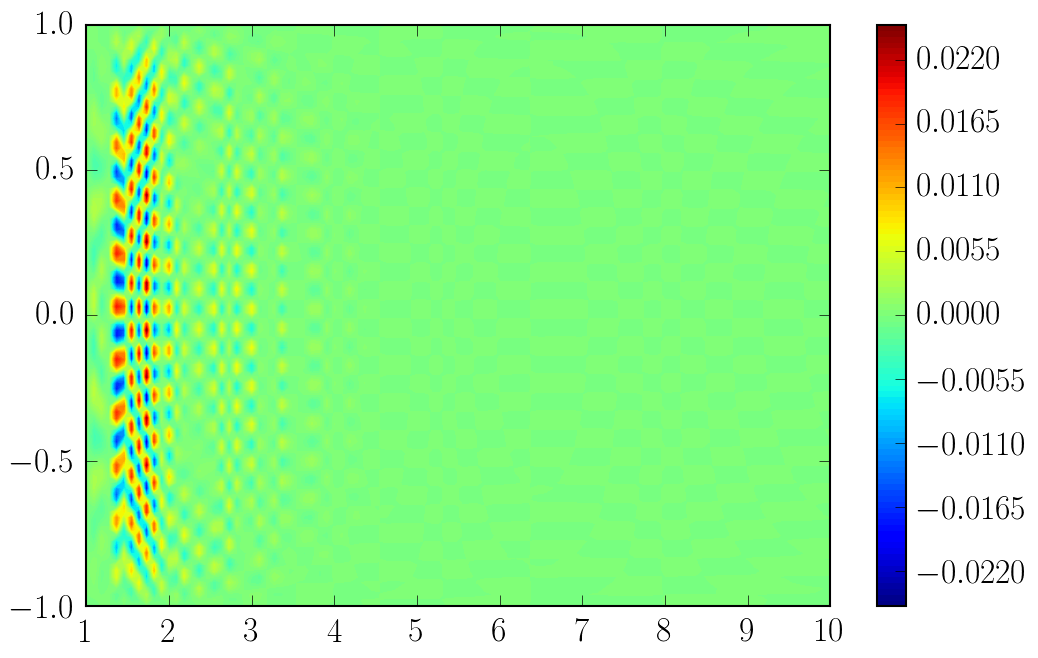

In [337]:
omega  = 1.*omega_c
tau    = 100.
gamma  = np.linspace(1., 10., 100)
cos_xi = np.linspace(-1., 1., 100)
G, C   = np.meshgrid(gamma, cos_xi)

pl.contourf(G, C, K_12_integrand(G, C, tau, omega).real, 100)
pl.colorbar()

In [338]:
def K_12_p_integrated(tau_prime, omega):
    real_part = dblquad(lambda gamma, cos_xi: K_12_integrand(gamma, cos_xi, tau_prime, omega).real, 
                       -1, 1, lambda x: 1., lambda x: np.inf)
    ans = real_part[0]
    return ans


def K_32_p_integrated(tau_prime, omega):
    real_part = dblquad(lambda gamma, cos_xi: K_32_integrand(gamma, cos_xi, tau_prime, omega).real, 
                       -1, 1, lambda x: 1., lambda x: np.inf)
    ans = real_part[0]
    return ans

In [343]:
time_before = time.time()

tau_prime = np.linspace(0., 200., 300)

nuratio = 100000.

data = np.vectorize(K_12_p_integrated)(tau_prime, nuratio*omega_c) * nuratio
time_after  = time.time()
print 'time elapsed: ', time_after - time_before

/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


time elapsed:  386.163207054


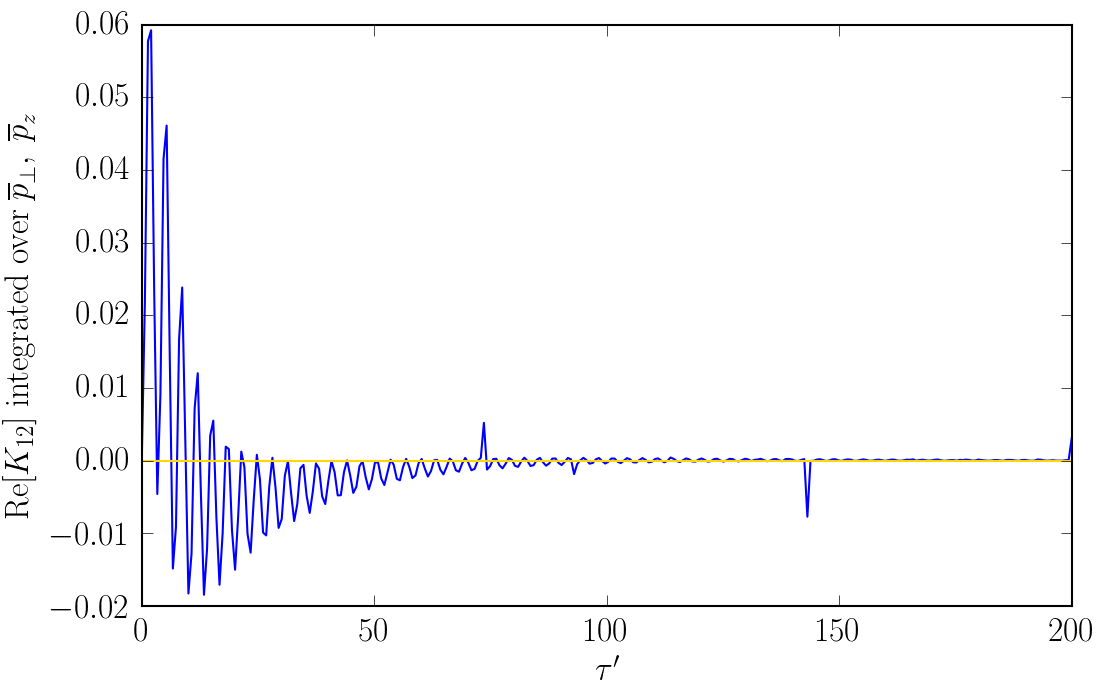

In [344]:
pl.plot(tau_prime, data)
pl.xlabel('$\\tau\'$')
pl.ylabel('$\\mathrm{Re}[K_{12}] \\mathrm{~integrated~over~} \\overline{p}_\perp,~\\overline{p}_z$')
pl.axhline(0, c='gold')
#pl.xlim([180., 200.])
#pl.ylim([-0.001, 0.001])

In [308]:
time_before = time.time()
K_12 = fixed_quad(lambda tau: np.vectorize(K_12_p_integrated)(tau, omega_c), 0., 30., n=45)[0]
K_32 = fixed_quad(lambda tau: np.vectorize(K_32_p_integrated)(tau, omega_c), 0., 30., n=45)[0]
time_after  = time.time()
print 'time elapsed: ', time_after - time_before

ans = K_12 * K_12_prefactor(omega_c) * np.cos(theta) + K_32 * K_32_prefactor(omega_c) * np.sin(theta)
print - 1./c * ans * omega_c

time elapsed:  12.364798069
6.48224953213e-10
